## Feature Engineering
### Corey Solitaire
#### 8/01/2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

from evaluate import linear_model

# This is the code for the Linear Model
from statsmodels.formula.api import ols

# Feature Engineering Walkthrough W/Maggie

****

Feature Engeneering:

**What are variables/features**
- variables that we use to hep predict our target.
- not our target variable (dependent/y)
- not all of the independent variables that we start with
- the independent variables we **END** with, or use in modeling

**Why would we choose to use some variables/features and not others?**
- variables might not influince your target
- may be connected to the target variable, sparious correlation
- too many null values
- if features are not independent of the target
- dependency between atributes
- categorical with too many values to encode
- variable could be too computationally expensive
- information that could lead to discrimination or unethical decision making

**Why would we create new variables/features?**
- if dependency between 2 variabls, they can be blended in to one variable. (Ex bedrooms and bathrooms)
- binning categorical with to many values into fewer categories
- continuous variables with too much noise (outliers)
- new insightss, (calculating area from lenght x width)

**Why do we try to limit the number of variables/features?**
- curse of dimensionality (too much information to see a common pattern)

**What is feature engeneering?**
- Creating new features
- removing features that are not usefull
- selecting top features
- transforming features (dummy variables)

**Goal of Feature Engeneering**

To make it easy for the computer to see the patterns


****

# Algorithmic Feature Selection Methods:

**Filter Methods:**

- look at featues with highest correlation target and select those features

- could give you three features that all give you the same infomration

  pro - not computationally expensive
  con - can not predict combined feature impact

**Wrapper Methods:**

- create (n) different models, evaluate preformance, and the featues that are in the model that preformed the bvest, are the ones to keep

  pro - can predict combined feature impact
  con - computationally expensive

****

# Importance of Scaling:

- if you have a variable with significantly higher units than another the algorithem is going give it an inflated importanbce.  So **Scaling is a must**

- **Always** scale before reguression

- **Never** scale the target! (Y)

****

****

# School Dataset: 
-Try to predict final grade (numeric 0-20)

****

**To Do:**

    -take care of nulls
    -data errors
    -data types
    -dummy vars
    -split
    -scaling
    -features (select kbest, recursive feature engineering)

In [2]:
df = pd.read_csv("student-mat.csv", sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


***

**Summerize**

***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

***

**Nulls:**

No missing values

***

***

**Data Errors, Outliers, Types**

- no problems

***

**Numeric Columns**

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


***

**We will want to scale our data based on age and absences**

***

**Object Colums**
- we are going to make a new df of only object colums

In [5]:
# df.dytpes == 'objects' returns a series.
# convert this to an array

mask = np.array(df.dtypes == 'object')
mask

array([ True,  True, False,  True,  True,  True, False, False,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False])

In [6]:
# using iloc, the df will fliter out all the index locations
# (columns number) where mask is false

object_df = df.iloc[:, mask]
object_df.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [7]:
for col in object_df.columns:
    print (object_df[col].value_counts())
    print("\n")

GP    349
MS     46
Name: school, dtype: int64


F    208
M    187
Name: sex, dtype: int64


U    307
R     88
Name: address, dtype: int64


GT3    281
LE3    114
Name: famsize, dtype: int64


T    354
A     41
Name: Pstatus, dtype: int64


other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64


other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64


course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64


mother    273
father     90
other      32
Name: guardian, dtype: int64


no     344
yes     51
Name: schoolsup, dtype: int64


yes    242
no     153
Name: famsup, dtype: int64


no     214
yes    181
Name: paid, dtype: int64


yes    201
no     194
Name: activities, dtype: int64


yes    314
no      81
Name: nursery, dtype: int64


yes    375
no      20
Name: higher, dtype: int64


yes    329
no      66
Name: internet, dtype: int64


no    

In [8]:
# Number of unique objects
object_df.nunique()

school        2
sex           2
address       2
famsize       2
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

**Dummy Variables**

In [9]:
# Create Dummy Variables
dummy_df = pd.get_dummies(object_df, dummy_na =False, drop_first=True)

In [10]:
# Add dummy variables to df
df=pd.concat([df, dummy_df], axis=1)

In [11]:
# Drop origional colums and just keep the dummys
df.drop(columns=object_df.columns, inplace=True)

In [12]:
# all data that can now be used to model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   famrel             395 non-null    int64
 7   freetime           395 non-null    int64
 8   goout              395 non-null    int64
 9   Dalc               395 non-null    int64
 10  Walc               395 non-null    int64
 11  health             395 non-null    int64
 12  absences           395 non-null    int64
 13  G1                 395 non-null    int64
 14  G2                 395 non-null    int64
 15  G3                 395 non-null    int64
 16  school_MS          395 non-null    uint8
 17  sex_M           

**Split**

In [13]:
# split data into train, validate, test
from sklearn.model_selection import train_test_split
train_validate, test = train_test_split(df, test_size =.2, 
                                        random_state =123)
train, validate = train_test_split(train_validate, test_size =.3, 
                                                random_state=123)

**Split into X and y dataframes**

y=G3

In [14]:
# X df are all cols except G3
X_train = train.drop(columns=['G3'])
X_validate = validate.drop(columns=['G3'])
X_test = test.drop(columns =['G3'])

# y df are just G3 (Target)
y_train = train[['G3']]
y_validate = validate[['G3']]
y_test = test[['G3']]

# X is uppercase to sigificy many featues
# y is lowercase to signify single feature

**Explore**

In [15]:
""" Skipping for Now"""

' Skipping for Now'

**Scale**

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(copy=True).fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

**Feature Selection**

-Select K Best
-RFE: Recursive Feature Elimination

In [17]:
# had to turn the array back in to a dataframe
# reset index to match x-train, however all values are now between 0 and 1
# in real life you would have to do the same for validate and test
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns.values).set_index([X_train.index.values])

In [18]:

X_train_scaled

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
142,0.000000,1.00,1.00,0.000000,0.666667,0.000000,0.75,0.25,0.25,0.00,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
326,0.333333,0.75,0.75,0.000000,0.000000,0.000000,0.75,0.50,1.00,0.50,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
88,0.166667,0.50,0.50,0.333333,0.333333,0.333333,0.75,0.75,0.25,0.00,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
118,0.333333,0.25,0.75,0.666667,0.333333,0.333333,1.00,0.25,0.75,0.00,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
312,0.666667,0.25,0.50,0.000000,0.333333,0.333333,0.75,1.00,0.25,0.25,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.333333,0.50,0.25,0.333333,0.666667,0.000000,0.50,0.25,0.50,0.00,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
61,0.166667,0.25,0.25,1.000000,0.000000,0.000000,1.00,1.00,1.00,1.00,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
38,0.000000,0.75,1.00,0.000000,0.666667,0.000000,0.75,0.50,0.25,0.00,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
243,0.166667,1.00,1.00,0.000000,0.000000,0.000000,1.00,0.50,0.25,0.00,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0


In [19]:
# bring in the feature selection models from sklearn
from sklearn.feature_selection import SelectKBest, f_regression

**KBest**

- filter method
- find and keep the atributes with teh highest correlation to the target variable

How?

1. The correlation between each attribute and the target is computed.
2. convert to an F-Score and then P-value
3. Top k attributes are kept

In [20]:
# Initalize the f_selector object: Defining the (f_selection) score method
# K= # of top features to keep

f_selector = SelectKBest(f_regression, k=13)

In [21]:
f_selector = f_selector.fit(X_train_scaled, y_train)

In [22]:
# Tells us which 13 are the top (Returned value)
X_train_reduced = f_selector.transform(X_train_scaled)
print(X_train.shape)
print(X_train_reduced.shape)

(221, 41)
(221, 13)


In [23]:
#Important: True for Columns to keep, false for colums to loose

f_support = f_selector.get_support()
print(f_support)

[ True  True  True  True  True  True False False False False False False
 False  True  True False  True False False False False  True False False
 False False False False False False  True False  True False False False
 False False  True False False]


In [24]:
# Prints the name of the features instead of just true/false

# Using iloc the df will filter out all the index locations
#(columns numbers) where the mask is false.  The : before the
#comma is for rows (if we wanted to filter rows) and after
#the comma for teh columns

f_feature = X_train_scaled.iloc[:,f_support].columns.tolist()
f_feature

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'G1',
 'G2',
 'sex_M',
 'Mjob_other',
 'reason_reputation',
 'guardian_other',
 'higher_yes']

In [25]:
# Turn these features in to a new dataframe, and now you 
# are ready to model!

X_reduced_scale = X_train_scaled.iloc[:,f_support]
X_reduced_scale.head()

,age,Medu,Fedu,traveltime,studytime,failures,G1,G2,sex_M,Mjob_other,reason_reputation,guardian_other,higher_yes
142,0.000000,1.00,1.00,0.000000,0.666667,0.000000,0.357143,0.578947,0.0,0.0,0.0,0.0,1.0
326,0.333333,0.75,0.75,0.000000,0.000000,0.000000,0.714286,0.789474,1.0,1.0,1.0,0.0,1.0
88,0.166667,0.50,0.50,0.333333,0.333333,0.333333,0.500000,0.526316,1.0,0.0,1.0,0.0,1.0
118,0.333333,0.25,0.75,0.666667,0.333333,0.333333,0.357143,0.368421,1.0,1.0,0.0,0.0,1.0
312,0.666667,0.25,0.50,0.000000,0.333333,0.333333,0.642857,0.578947,1.0,1.0,0.0,1.0,1.0


**We coud run through it again with again with a different k value and select those best features.  We can then run the diffent dataframes throught the models, and select the best model

***

**RFE** (Recursive Feature Elimination)

Wrapper method: 

Recursivly build model after model with fewer and fewer features. It will then identify which model preforms the best, then return which features were used to build that model.  Those are the featues that we will keep.

***

In [26]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [27]:
#Initialize the linear regression object
lm = LinearRegression()

In [28]:
#Initalize the RFE object, setting the hyperparamters to be our
# linear model above (lm), adn teh number of features we want returned

rfe = RFE(lm, 13)

In [29]:
# fit and transform model (Transforms x to include those features)
# If you assign to a variable the output will go away
rfe.fit_transform(X_train_scaled, y_train)

array([[0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.33333333, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.16666667, 0.33333333, 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.16666667, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.16666667, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [30]:
# Returns the mask of the selected features (as transformd array)
mask =rfe.support_

In [31]:
X_reduced_scaled_rfe = X_train_scaled.iloc[:,mask]
X_reduced_scaled_rfe.head()

,age,traveltime,failures,famrel,absences,G1,G2,Mjob_health,Mjob_other,Mjob_services,schoolsup_yes,famsup_yes,internet_yes
142,0.000000,0.000000,0.000000,0.75,0.035714,0.357143,0.578947,0.0,0.0,0.0,0.0,1.0,1.0
326,0.333333,0.000000,0.000000,0.75,0.053571,0.714286,0.789474,0.0,1.0,0.0,0.0,0.0,1.0
88,0.166667,0.333333,0.333333,0.75,0.214286,0.500000,0.526316,0.0,0.0,1.0,0.0,0.0,1.0
118,0.333333,0.666667,0.333333,1.00,0.357143,0.357143,0.368421,0.0,1.0,0.0,0.0,1.0,1.0
312,0.666667,0.000000,0.333333,0.75,0.053571,0.642857,0.578947,0.0,1.0,0.0,0.0,0.0,1.0


In [32]:
# featues selected using rfe
X_reduced_scaled_rfe.columns.tolist()

['age',
 'traveltime',
 'failures',
 'famrel',
 'absences',
 'G1',
 'G2',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'schoolsup_yes',
 'famsup_yes',
 'internet_yes']

In [33]:
# Featues selected using selectbest
X_reduced_scale.columns.tolist()

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'G1',
 'G2',
 'sex_M',
 'Mjob_other',
 'reason_reputation',
 'guardian_other',
 'higher_yes']

**Some features are the same, some are different**

****

<div class="alert alert-block alert-success"></div>

****

# Feature Engineering Exercises

In [34]:
df = sns.load_dataset("tips")
df.shape

(244, 7)

In [35]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [37]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Exercises

****

## 1. Load the tips dataset.

### **A. Create a column named tip_percentage. This should be the tip amount divided by the total bill.**

In [38]:
# .assign makes temp colums in data table
#train.assign(tip_percentage=train.tip / train.total_bill)

df['tip_percentage'] = round((df.tip / df.total_bill),2)
df

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06
1,10.34,1.66,Male,No,Sun,Dinner,3,0.16
2,21.01,3.50,Male,No,Sun,Dinner,3,0.17
3,23.68,3.31,Male,No,Sun,Dinner,2,0.14
4,24.59,3.61,Female,No,Sun,Dinner,4,0.15
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.20
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.07
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.09
242,17.82,1.75,Male,No,Sat,Dinner,2,0.10


### **B. Create a column named price_per_person. This should be the total bill divided by the party size.**

In [39]:
df['size'] = df['size'].astype('float')
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2.0,0.06
1,10.34,1.66,Male,No,Sun,Dinner,3.0,0.16
2,21.01,3.50,Male,No,Sun,Dinner,3.0,0.17
3,23.68,3.31,Male,No,Sun,Dinner,2.0,0.14
4,24.59,3.61,Female,No,Sun,Dinner,4.0,0.15


In [40]:
df['price_per_person'] = (df.total_bill / df['size'])
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage,price_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2.0,0.06,8.495000
1,10.34,1.66,Male,No,Sun,Dinner,3.0,0.16,3.446667
2,21.01,3.50,Male,No,Sun,Dinner,3.0,0.17,7.003333
3,23.68,3.31,Male,No,Sun,Dinner,2.0,0.14,11.840000
4,24.59,3.61,Female,No,Sun,Dinner,4.0,0.15,6.147500


### **C. Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount? The tip percentage?**

<div class="alert alert-block alert-success">I think total_bill would be an importing feature for predicting tip amount and tip percentabe</div>

### **D. Use all the other numeric features to predict tip amount. Use select k best and recursive feature elimination to select the top 2 features. What are they?**

#### Split

In [41]:
# First we need to break data up (train, validate, split)

train_validate, test = train_test_split(df, test_size = .2, random_state = 123)
train, validate = train_test_split(train_validate, test_size = .3, random_state = 123)
train.shape, validate.shape, test.shape

((136, 9), (59, 9), (49, 9))

#### Split in to X and y Dataframes (Target is Tip)

In [42]:
# Assign variables
# x df's are all numeric cols except tip
X_train = train.drop(columns=['tip','sex','smoker','day', 'time'])
X_validate = validate.drop(columns=['tip','sex','smoker','day', 'time'])
X_test = test.drop(columns=['tip','sex','smoker','day', 'time'])

# y df's are just tip
y_train = train[['tip']]
y_validate = validate[['tip']]
y_test = test[['tip']]

#### Scale Data

In [43]:
scaler = MinMaxScaler(copy=True).fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

In [44]:

X_train_scaled = pd.DataFrame(X_train_scaled, 
                              columns=X_train.columns.values).\
                            set_index([X_train.index.values])

X_validate_scaled = pd.DataFrame(X_validate_scaled, 
                                columns=X_validate.columns.values).\
                            set_index([X_validate.index.values])

X_test_scaled = pd.DataFrame(X_test_scaled, 
                                columns=X_test.columns.values).\
                            set_index([X_test.index.values])


#### Select K-Best

In [45]:
# Defining KBest object
f_selector = SelectKBest(f_regression, k=2)

# Fitting data to model
f_selector = f_selector.fit(X_train_scaled, y_train)

# Transforming dataset
X_train_reduced = f_selector.transform(X_train_scaled)
print(X_train.shape)
print(X_train_reduced.shape)

# Making a boolean mask
f_support = f_selector.get_support()

# List of Columns to keep
f_feature = X_train_scaled.iloc[:,f_support].columns.tolist()

# Output list as DF for Modeling
X_reduced_scaled = X_train_scaled.iloc[:,f_support]

print(str(len(f_feature)), 'selected features')
print(f_feature)

(136, 4)
(136, 2)
2 selected features
['total_bill', 'size']


In [46]:
# Modeling Dataframe
X_reduced_scaled.head()

,total_bill,size
18,0.307114,0.4
172,0.092355,0.2
118,0.206805,0.2
28,0.411622,0.2
237,0.657534,0.2


####  Evaluating Linear Features

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 286.43166397058826
Model SSE 153.53663973018627
SSE is 153.53663973018627  which is the sum sf squared errors
MSE is 1.1289458803690167  which is the average squared error
RMSE is 1.0625186494217487  which is the square root of the MSE
R-squared =  0.464
p-value for model significance =  7.18647033208955e-20
Reject Null: The model bulit on indipendent variables explains the relationship, validates $r^2$


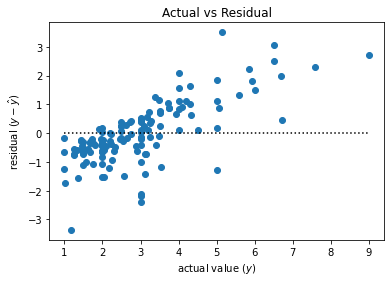

In [47]:
# Evaluatin total_bill
linear_model(ols('tip ~ total_bill', train).fit(), train.tip, train.total_bill)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 286.43166397058826
Model SSE 196.56879093547667
SSE is 196.56879093547667  which is the sum sf squared errors
MSE is 1.445358756878505  which is the average squared error
RMSE is 1.202230741945366  which is the square root of the MSE
R-squared =  0.314
p-value for model significance =  1.3416418968774152e-12
Reject Null: The model bulit on indipendent variables explains the relationship, validates $r^2$


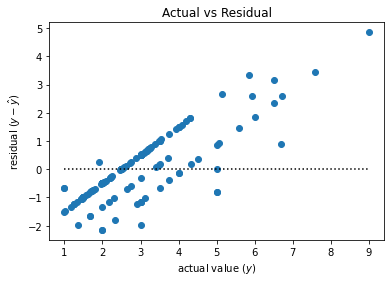

In [48]:
# Evaluatin size
linear_model(ols('tip ~ size', train).fit(), train.tip, train.size)

***

#### Takeaway
According to KBest the best features to predict tip are **total_bill and size**

***

### Recursive Feature Elimination

### **E. Use all the other numeric features to predict tip percentage. Use select k best and recursive feature elimination to select the top 2 features. What are they?**

#### Split in to X and y Dataframes (Target is tip_percentage)

In [49]:
# Assign variables
# x df's are all numeric cols except tip
X_train2 = train.drop(columns=['tip','sex','smoker','day', 'time','tip_percentage'])
X_validate2 = validate.drop(columns=['tip','sex','smoker','day', 'time','tip_percentage'])
X_test2 = test.drop(columns=['tip','sex','smoker','day', 'time','tip_percentage'])

# y df's are just tip
y_train2 = train[['tip_percentage']]
y_validate2 = validate[['tip_percentage']]
y_test2 = test[['tip_percentage']]

#### Scale Data

In [50]:
scaler = MinMaxScaler(copy=True).fit(X_train2)

X_train_scaled2 = scaler.transform(X_train2)
X_validate_scaled2 = scaler.transform(X_validate2)
X_test_scaled2 = scaler.transform(X_test2)

X_train_scaled2 = pd.DataFrame(X_train_scaled2, 
                              columns=X_train2.columns.values).\
                            set_index([X_train2.index.values])

X_validate_scaled2 = pd.DataFrame(X_validate_scaled2, 
                                columns=X_validate2.columns.values).\
                            set_index([X_validate2.index.values])

X_test_scaled2 = pd.DataFrame(X_test_scaled2, 
                                columns=X_test2.columns.values).\
                            set_index([X_test2.index.values])


In [51]:
# Initalize regression object
lm = LinearRegression()

# Initialize the RFE object, setting the hyperparameters to be our linear model above (lm), and the number of features we want returned.
rfe = RFE(lm, 2)

# Fit model to data
X_rfe = rfe.fit_transform(X_train_scaled2, y_train2)
print(X_train2.shape)                        # The origional shape of the data frame
print(X_rfe.shape)                      # The shape of the df after feature selection

mask = rfe.support_                         # boolean mask of features and if they should be used

X_reduced_scaled_rfe = X_train_scaled2.iloc[:,mask] # returns df ready for modeling

rfe_feature = X_reduced_scaled_rfe.columns.tolist()       # returns list of selected features
print(str(len(rfe_feature)), 'selected features')
print(rfe_feature) 

(136, 3)
(136, 2)
2 selected features
['size', 'price_per_person']


####  Evaluating Linear Features

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 0.6940757352941176
Model SSE 0.6871632283991961
SSE is 0.6871632283991961  which is the sum sf squared errors
MSE is 0.005052670797052912  which is the average squared error
RMSE is 0.07108214119631535  which is the square root of the MSE
R-squared =  0.01
p-value for model significance =  0.24769728264383198
Reject Null: The model bulit on indipendent variables explains the relationship, validates $r^2$


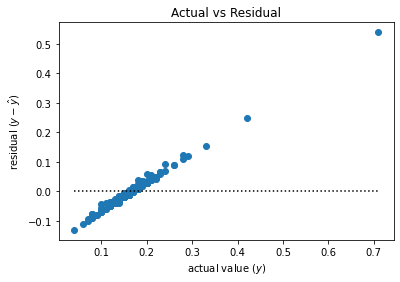

In [52]:
# Evaluatin size
linear_model(ols('tip_percentage ~ size', train).fit(), train.tip_percentage, train.size)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 0.6940757352941176
Model SSE 0.6234687610137108
SSE is 0.6234687610137108  which is the sum sf squared errors
MSE is 0.004584329125100815  which is the average squared error
RMSE is 0.06770767404881677  which is the square root of the MSE
R-squared =  0.102
p-value for model significance =  0.0001539898470091086
Reject Null: The model bulit on indipendent variables explains the relationship, validates $r^2$


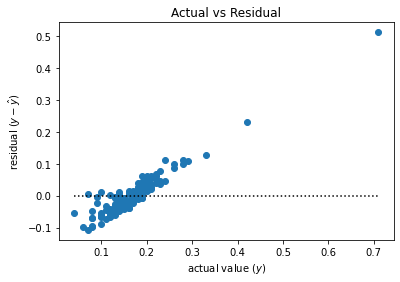

In [53]:
# Evaluatin price_per_person
linear_model(ols('tip_percentage ~ price_per_person', train).fit(), train.tip_percentage, train.price_per_person)

***

#### Takeaway
According to RFE the best features to predict tip are **size and price_per_person**

***

### F. Why do you think select k best and recursive feature elimination might give different answers for the top features? Does this change as you change the number of features your are selecting?**

The algorithems use different methods to arrive at differet conclusoins.  

KBest is a filter method algorithm that determines the correlation (F-score) between each attribute & the target, converts the F-score and a p-value, and based on that p-vales selects tht top k features. 

RFE is a wrapper method algorithm (2 algorithms are combined) that recursively build model after model with fewer and fewer features. It will then identify which model performs the best. Then, return the top k features were used in that model. 

As you change the number of features the rusts of the KBest algrithm the results would not be expected to change, as it examines the p-value of each feature individually.  However the results would change in the RFE model as it has the ability to determine the combined weights of indivual featues.  
    


<div class="alert alert-block alert-success"></div>

****

## 2. Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [54]:
# Function for selecting_kbest
def select_kbest(k, X_train_scaled, y_train):
    # Defining KBest object
    f_selector = SelectKBest(f_regression, k=k)

    # Fitting data to model
    f_selector = f_selector.fit(X_train_scaled, y_train)

    # Transforming dataset
    X_train_reduced = f_selector.transform(X_train_scaled)
    print(X_train.shape)
    print(X_train_reduced.shape)

    # Making a boolean mask
    f_support = f_selector.get_support()

    # List of Columns to keep
    f_feature = X_train_scaled.iloc[:,f_support].columns.tolist()

    # Output list as DF for Modeling
    X_reduced_scaled = X_train_scaled.iloc[:,f_support]

    print(str(len(f_feature)), 'selected features')
    print(f_feature)
    return X_reduced_scaled

In [55]:
model_df = select_kbest(1, X_train_scaled, y_train)

(136, 4)
(136, 1)
1 selected features
['total_bill']


In [56]:
model_df.head()

,total_bill
18,0.307114
172,0.092355
118,0.206805
28,0.411622
237,0.657534


<div class="alert alert-block alert-success"></div>

****

## 3.  Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [57]:
def select_rfe(k, X_train_scaled, y_train):
    # Initalize regression object
    lm = LinearRegression()

    # Initialize the RFE object, setting the hyperparameters to be our linear model above (lm), and the number of features we want returned.
    rfe = RFE(lm, k)

    # Fit model to data
    X_rfe = rfe.fit_transform(X_train_scaled, y_train)
    print(X_train.shape)                        # The origional shape of the data frame
    print(X_rfe.shape)                      # The shape of the df after feature selection

    mask = rfe.support_                         # boolean mask of features and if they should be used

    X_reduced_scaled_rfe = X_train_scaled.iloc[:,mask] # returns df ready for modeling

    rfe_feature = X_reduced_scaled_rfe.columns.tolist()       # returns list of selected features
    print(str(len(rfe_feature)), 'selected features')
    print(rfe_feature) 
    return X_reduced_scaled_rfe

<div class="alert alert-block alert-success"></div>

In [58]:
# # Test DF

df = pd.read_csv("student-mat.csv", sep=";")
mask = np.array(df.dtypes == "object")
obj_df = df.iloc[:, mask]
dummy_df = pd.get_dummies(obj_df, dummy_na=False, drop_first=True)
df = pd.concat([df, dummy_df], axis=1)
df.drop(columns=obj_df.columns, inplace=True)
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123)
train, validate = train_test_split(train_validate, 
                                   test_size=.3, random_state=123)

X_train = train.drop(columns=['G3'])
X_validate = validate.drop(columns=['G3'])
X_test = test.drop(columns=['G3'])

y_train = train[['G3']]
y_validate = validate[['G3']]
y_test = test[['G3']]

scaler = MinMaxScaler(copy=True).fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, 
                              columns=X_train.columns.values).\
                            set_index([X_train.index.values])

X_validate_scaled = pd.DataFrame(X_validate_scaled, 
                                columns=X_validate.columns.values).\
                            set_index([X_validate.index.values])

X_test_scaled = pd.DataFrame(X_test_scaled, 
                                columns=X_test.columns.values).\
                            set_index([X_test.index.values])

In [59]:
model_df = select_rfe(9, X_train_scaled, y_train)

(221, 41)
(221, 9)
9 selected features
['age', 'traveltime', 'famrel', 'absences', 'G1', 'G2', 'Mjob_health', 'Mjob_other', 'Mjob_services']


****

## 4.  Load the swiss dataset and use all the other features to predict Fertility. Find the top 3 features using both select k best and recursive feature elimination (use the functions you just built to help you out).

In [60]:
# Swiss Dataset

url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/swiss.csv"
df = pd.read_csv(url, index_col=0)
df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [61]:
df.isnull().sum()

Fertility           0
Agriculture         0
Examination         0
Education           0
Catholic            0
Infant.Mortality    0
dtype: int64

In [62]:
df.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


***
#### Takeaway:
Catholic is skewed, all other columns are evently distributed

***

#### Rename DF Columns

In [63]:
df.rename(columns={'Fertility':'fertility', 'Agriculture':'agriculture', 'Examination':'examination', 'Education':'education','Catholic':'catholic','Infant.Mortality':'infant_mortality'}, inplace =True)
df.head()

,fertility,agriculture,examination,education,catholic,infant_mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


#### Split (Train/Validate/Test)

In [64]:
# First we need to break data up (train, validate, split)

train_validate, test = train_test_split(df, test_size = .2, random_state = 123)
train, validate = train_test_split(train_validate, test_size = .3, random_state = 123)
train.shape, validate.shape, test.shape

((25, 6), (12, 6), (10, 6))

#### Split in to X and y Dataframes (Target is Fertility)

In [65]:
# Assign variables
# x df's are all numeric cols except tip
X_train = train.drop(columns=['fertility'])
X_validate = validate.drop(columns=['fertility'])
X_test = test.drop(columns=['fertility'])

# y df's are just tip
y_train = train[['fertility']]
y_validate = validate[['fertility']]
y_test = test[['fertility']]

#### Scale Data

In [66]:
scaler = MinMaxScaler(copy=True).fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, 
                              columns=X_train.columns.values).\
                            set_index([X_train.index.values])

X_validate_scaled = pd.DataFrame(X_validate_scaled, 
                                columns=X_validate.columns.values).\
                            set_index([X_validate.index.values])

X_test_scaled = pd.DataFrame(X_test_scaled, 
                                columns=X_test.columns.values).\
                            set_index([X_test.index.values])

#### KBest Model

In [67]:
model_df = select_kbest(3, X_train_scaled, y_train)

(25, 5)
(25, 3)
3 selected features
['examination', 'catholic', 'infant_mortality']


#### RFE Model

In [68]:
model_df = select_rfe(3, X_train_scaled, y_train)

(25, 5)
(25, 3)
3 selected features
['agriculture', 'examination', 'infant_mortality']


### Evaluating Linear Features


Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 2388.1376000000005
Model SSE 1716.0224632291734
SSE is 1716.0224632291734  which is the sum sf squared errors
MSE is 68.64089852916693  which is the average squared error
RMSE is 8.284980297451947  which is the square root of the MSE
R-squared =  0.281
p-value for model significance =  0.006369320592827129
Reject Null: The model bulit on indipendent variables explains the relationship, validates $r^2$


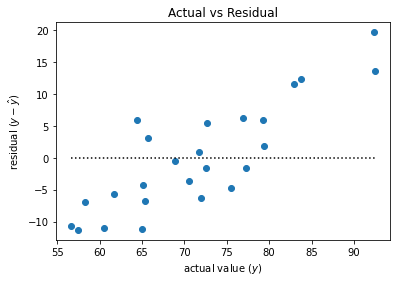

In [69]:
# Evaluate Examination
linear_model(ols('fertility ~ examination', train).fit(), train.fertility, train.examination)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 2388.1376000000005
Model SSE 1908.5273101619603
SSE is 1908.5273101619603  which is the sum sf squared errors
MSE is 76.34109240647841  which is the average squared error
RMSE is 8.737338977427761  which is the square root of the MSE
R-squared =  0.201
p-value for model significance =  0.024662531207991115
Reject Null: The model bulit on indipendent variables explains the relationship, validates $r^2$


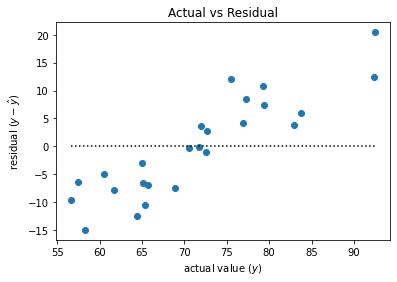

In [70]:
# Evaluate Infant.Mortality
linear_model(ols('fertility ~ infant_mortality', train).fit(), train.fertility, train.infant_mortality)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 2388.1376000000005
Model SSE 1355.6005666904389
SSE is 1355.6005666904389  which is the sum sf squared errors
MSE is 54.224022667617554  which is the average squared error
RMSE is 7.363696263943642  which is the square root of the MSE
R-squared =  0.432
p-value for model significance =  0.00035458546338030687
Reject Null: The model bulit on indipendent variables explains the relationship, validates $r^2$


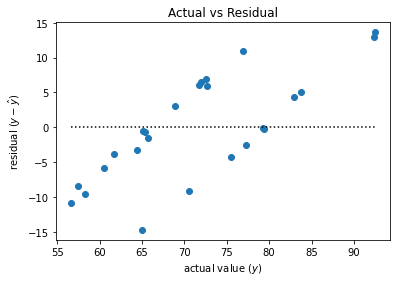

In [71]:
# Evaluate catholic
linear_model(ols('fertility ~ catholic', train).fit(), train.fertility, train.catholic)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 2388.1376000000005
Model SSE 2313.9990923309856
SSE is 2313.9990923309856  which is the sum sf squared errors
MSE is 92.55996369323942  which is the average squared error
RMSE is 9.62080888975763  which is the square root of the MSE
R-squared =  0.031
p-value for model significance =  0.3995137240236539
Reject Null: The model bulit on indipendent variables explains the relationship, validates $r^2$


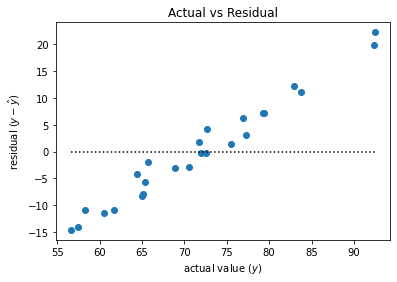

In [72]:
# Evaluate agriculture
linear_model(ols('fertility ~ agriculture', train).fit(), train.fertility, train.agriculture)

***

#### Takeaway:
 
- Catholic was the only feature that demonstrated a slightly a linear relationship
- Each feature passed the F-test of signficicance, but almost none were good fits for a liner model

***

<div class="alert alert-block alert-success"></div>